In [2]:
#!pip install seaborn
#!pip install keras
#!pip install seaborn
#!pip install tensorflow


In [1]:
%%bash
pip install seaborn

  Running setup.py bdist_wheel for seaborn: started
  Running setup.py bdist_wheel for seaborn: finished with status 'done'
  Stored in directory: /gpfs/fs01/user/sa8d-4d2d1ae1480ddc-32d4ec4f84f8/.cache/pip/wheels/cb/c8/67/83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


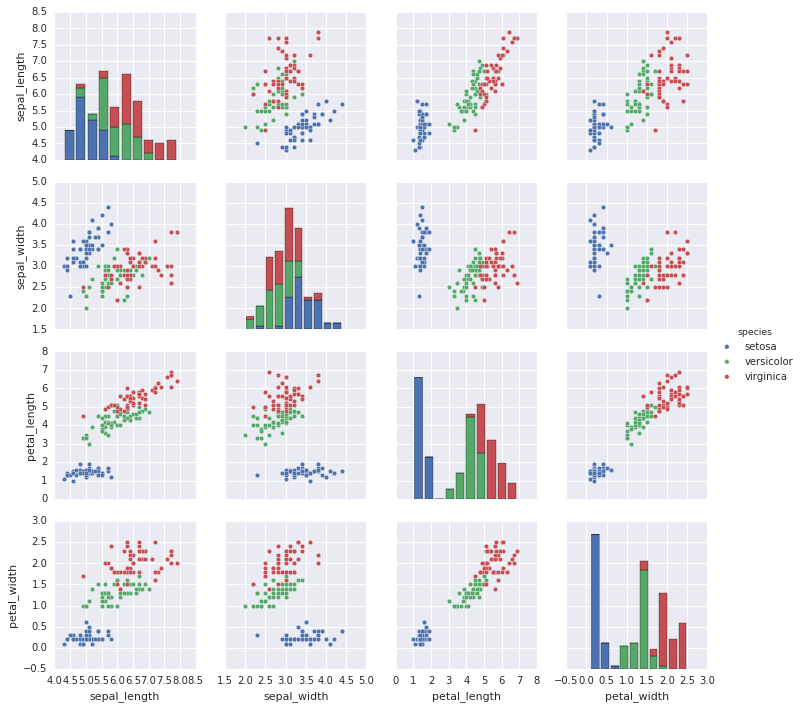

In [21]:
# sickit-learn way to modelling data
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_08e72796ef0f4008926b09dbff8a8400(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_c4c7006af986f7e4b7179496808285cc62844568','domain': {'id': 'e42e60fd2c5a4d018d8371ab53f646a2'},
            'password': 'M6SeBiG=KDyKV(0L'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return resp2.text

# Your data file was loaded into a StringIO object and you can process the data.
# Please read the documentation of pandas to learn more about your possibilities to load your data.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html
data_1 = get_object_storage_file_with_credentials_08e72796ef0f4008926b09dbff8a8400('kerasdl', 'iris.txt')
iris = sns.load_dataset("iris")
iris.head()

sns.pairplot(iris, hue='species');


In [44]:
#Munge and split the data for training and testing
#hold the petal and sepal data in an array X and the species labels in a corresponding array y
X = iris.values[:, :4]
#print(X)
y = iris.values[:, 4]
#print(y)
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)
#Train a scikit-learn classifier
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)
#Assess the classifier using accuracy
print("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [50]:
#Keras Way
#1-hot-encoding of categorical variables
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

#Build the neural network model


[0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2
 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]


In [51]:
model = Sequential()
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])


In [53]:
model.fit(train_X, train_y_ohe, nb_epoch=100, batch_size=1, verbose=0);

In [56]:
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.97
